apply the bilateral blur then sustract it from the original image then add the result to the original image

In [46]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

hdr_img = cv.imread("image/image.tif", -1)
cv.imshow('TiffExemple',hdr_img)
cv.waitKey(0)
cv.destroyAllWindows()


In [47]:

img8 = (hdr_img/256).astype('uint8')
#print(img8.dtype)
blur = cv.bilateralFilter(img8,9,75,75)  #cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
 
cv.imshow('TiffExemple',(img8-blur)+img8)
cv.waitKey(0)
cv.destroyAllWindows()

def ApplyBilateralFilter(img):
    blur = cv.bilateralFilter(img,9,75,75)
    result = img + (img-blur) 
    return result
ApplyBilateralFilter(img8)


array([[244, 244, 243, ..., 218, 218, 218],
       [ 89,  85,  83, ...,  59,  59,  59],
       [ 93,  89,  84, ...,  65,  65,  65],
       ...,
       [ 69,  69,  67, ...,  69,  63,  54],
       [ 69,  67,  67, ...,  66,  62,  57],
       [255, 255,   0, ..., 222, 222, 222]], dtype=uint8)

get slices from hdr image

In [48]:
new = (hdr_img[:,:] < 65535)
print(new)
cv.imshow('TiffExemple',new*hdr_img)
cv.waitKey(0)
cv.destroyAllWindows()
       

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [49]:
#slicesss
x = np.linspace(0,65535,30)
slices = []
for i in range(29):
        new= hdr_img[:,:] < x[i+1]
        new = hdr_img*new
        new1= new[:,:] > x[i]
        slices.append(new1*hdr_img)

print(len(slices))
print(len(slices[0]))
print(len(slices[0][0]))

29
1024
1024


In [50]:
columns = 5
rows = 6
fig = plt.figure(figsize=(20, 20))
for i in range(1, columns*rows +1):
    img = slices[i-2]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

    


Equalize(stretch) each slice

(29, 1024, 1024)


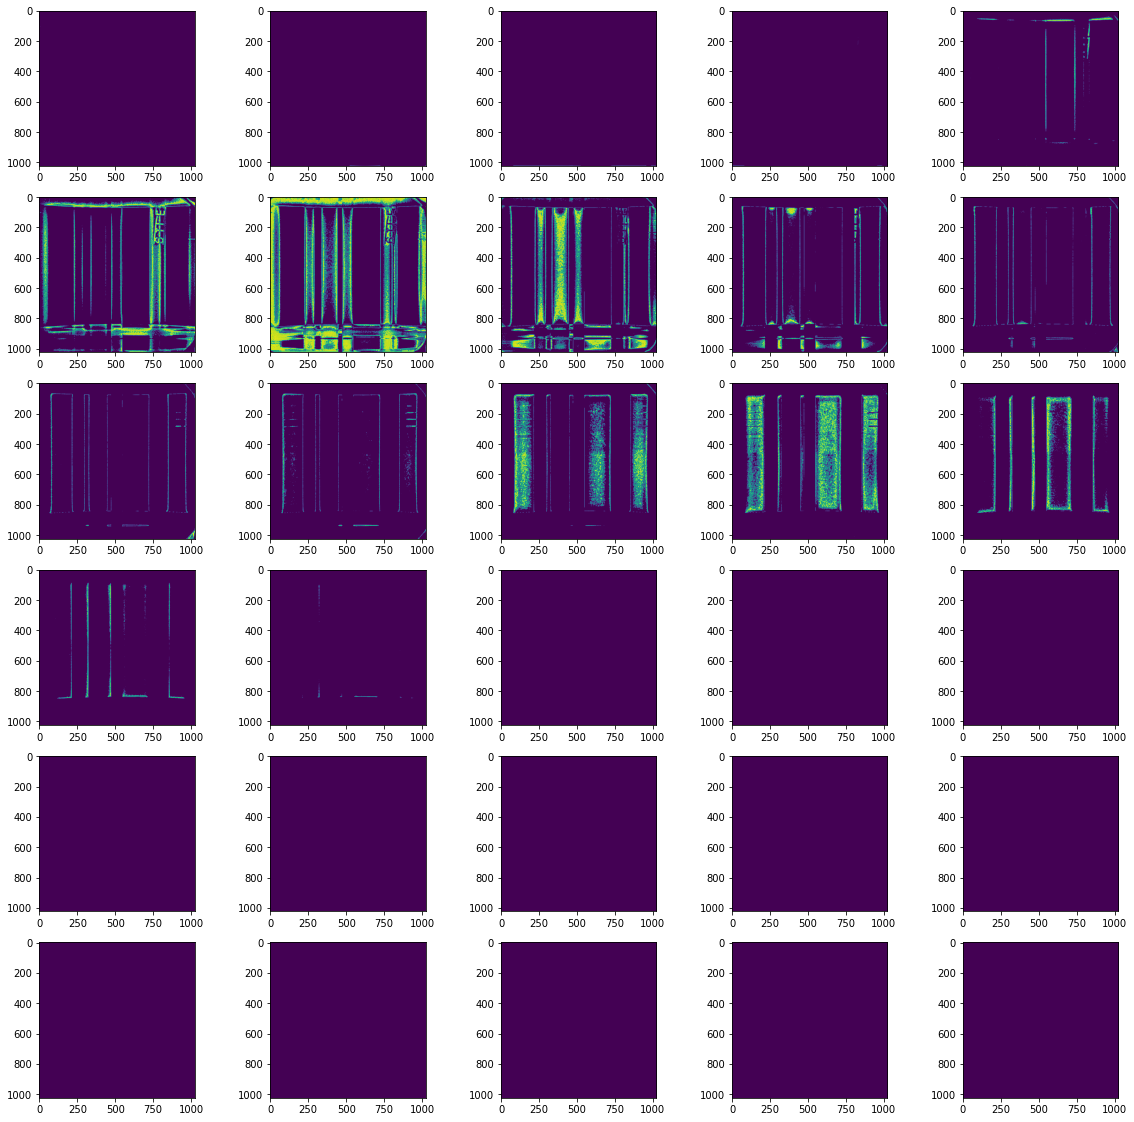

In [60]:
slices_stretch = []
max_bit = 2**16
for slc in slices :

    hist,bins = np.histogram(slc.flatten(),max_bit,[0,max_bit])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*max_bit/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint16')

    slices_stretch.append(cdf[slc])

print(np.array(slices_stretch).shape) # Show shape

columns = 5
rows = 6
fig = plt.figure(figsize=(20, 20))
for i in range(1, columns*rows +1):
    img = slices[i-2]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


cv.imshow('TiffStretchExemple',slices[5])
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('TiffStretchExemple',slices_stretch[5])
cv.waitKey(0)
cv.destroyAllWindows()
